# Project Title:
# OneBank: Predicting Customer Loan Acceptance to Maximize Campaign Efficiency

In [3]:
import pandas as pd
import numpy as np

# Load the data

In [5]:
df = pd.read_csv("bank.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


**shows all the column names in the dataset.**

It helps has:

* See what data is available

* Check for spaces or typos in column names

* Know which columns to use or drop later

In [7]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
# Clean column names replace spaces with underscores
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns


Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

**Check quick summary of the dataset, showing column names, data types, non-null counts, and overall structure. It's useful for checking data types and missing values before preprocessing.**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [11]:
# Check for missing values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

**Checking summary statistics for all numeric columns in the dataset, including count, mean, standard deviation, minimum, and maximum values. It helps you understand the distribution and range of the data.**

In [13]:
df.describe()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Data Correction: Experience Column
The Experience column contains invalid negative values(-3.000000). These were replaced with the median of valid experience values without removing rows.


In [15]:
# Replace negative experience with the median of valid values

median_exp = df[df['Experience'] >= 0]['Experience'].median()
df['Experience'] = df['Experience'].apply(lambda x: median_exp if x < 0 else x)


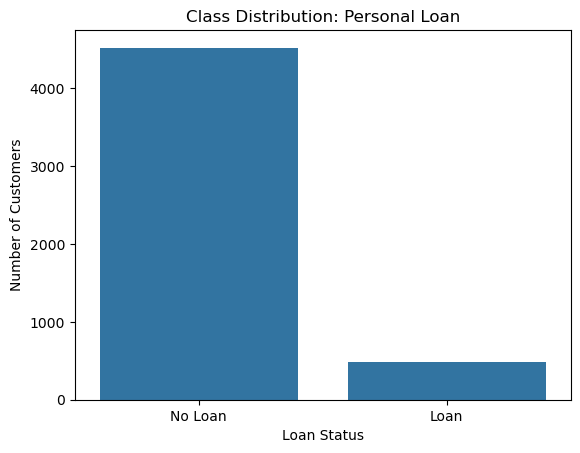

In [16]:
# Visualize class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Personal_Loan', data=df)
plt.title("Class Distribution: Personal Loan")
plt.xticks([0, 1], ["No Loan", "Loan"])
plt.ylabel("Number of Customers")
plt.xlabel("Loan Status")
plt.show()


**Interpretation:**
- Most customers did not accept the personal loan offer (No Loan).

- Only a small number of customers accepted the loan (Loan).

This means the data is imbalanced there are more "No Loan" cases than "Loan" cases.

# Preprocessing and Feature Engineering

# Encoding Categorical Variables and Defining Features

Categorical variables in the dataset are converted to numeric form using LabelEncoder, which assigns a unique number to each category. This is necessary because most machine learning models work only with numeric inputs. After encoding, we drop irrelevant columns like ID and ZIP_Code, and define X as the set of features and y as the target variable (Personal_Loan) we want to predict.

In [20]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Drop irrelevant columns and define X and y
X = df.drop(columns=['ID', 'ZIP_Code', 'Personal_Loan'])
y = df['Personal_Loan']


# Standardization and Train-Test Split

The feature variables are standardized using StandardScaler to ensure they have a mean of 0 and a standard deviation of 1. This helps many models perform better by treating all features equally. After scaling, the dataset is split into training and validation sets using train_test_split, with 70% of the data used for training and 30% for validation. The stratify=y option maintains the original class distribution in both sets.


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)



# Model Building
In this step, I have trained three classification models on the training data:

* Naïve Bayes

* Random Forest 

* Logistic Regression 

# Naïve Bayes Model

A Naïve Bayes classifier is trained to predict personal loan acceptance. It assumes all the features to be conditionally independent, making it simple and efficient, especially for baseline models. The performance of the model is verified through a confusion matrix heatmap and an accurate classification report with precision, recall, F1-score, and overall accuracy for both types of loans.


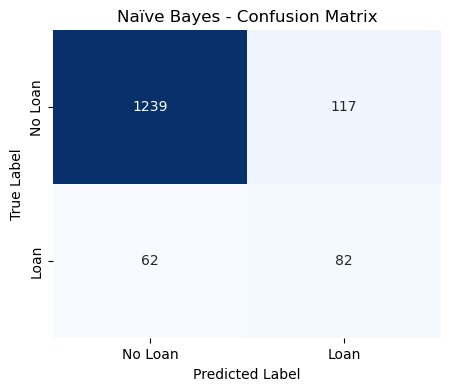


Naïve Bayes – Classification Report
              precision    recall  f1-score   support

     No Loan       0.95      0.91      0.93      1356
        Loan       0.41      0.57      0.48       144

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_val)
nb_probs = nb_model.predict_proba(X_val)[:, 1]

# confusion matrix
nb_cm = confusion_matrix(y_val, nb_preds)

plt.figure(figsize=(5, 4))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["No Loan", "Loan"], yticklabels=["No Loan", "Loan"])

plt.title("Naïve Bayes - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Report
print("\nNaïve Bayes – Classification Report")
print(classification_report(y_val, nb_preds, target_names=["No Loan", "Loan"]))


**Interpretation:**

- 1239 True Negatives (TN): Customers who did not take a loan and were correctly predicted as "No Loan".

- 117 False Positives (FP): Customers who did not take a loan but were incorrectly predicted as "Loan".
This may lead to unnecessary marketing efforts.

- 62 False Negatives (FN): Customers who actually took a loan but were incorrectly predicted as "No Loan".
These are missed revenue opportunities.

- 82 True Positives (TP): Customers who took a loan and were correctly identified by the model.



# Random Forest Model

I train an ensemble Random Forest classifier with 100 trees on the dataset to predict whether a customer would approve or not a personal loan. An ensemble model takes the average prediction of multiple decision trees, reducing overfitting and improving precision by a vote-based classification mechanism. I look at its performance over the validation set after undergoing training on a confusion matrix and classification report containing the precision, recall, F1-score, and accuracy metrics of the two classes ("No Loan" and "Loan").

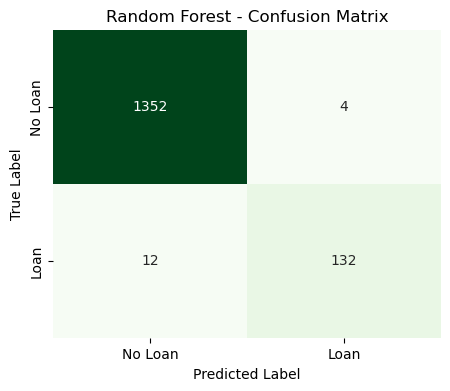


Random Forest – Classification Report
              precision    recall  f1-score   support

     No Loan       0.99      1.00      0.99      1356
        Loan       0.97      0.92      0.94       144

    accuracy                           0.99      1500
   macro avg       0.98      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500



In [28]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)
rf_probs = rf_model.predict_proba(X_val)[:, 1]

# confusion matrix
rf_cm = confusion_matrix(y_val, rf_preds)

plt.figure(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=["No Loan", "Loan"], yticklabels=["No Loan", "Loan"])

plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Report
print("\nRandom Forest – Classification Report")
print(classification_report(y_val, rf_preds, target_names=["No Loan", "Loan"]))



**Interpretation:**
- 1352 True Negatives (TN):
Customers who did not take a loan and were correctly predicted as "No Loan".

- 4 False Positives (FP):
Customers who did not take a loan but were incorrectly predicted as "Loan".
This may lead to unnecessary marketing efforts.

- 12 False Negatives (FN):
Customers who actually took a loan but were incorrectly predicted as "No Loan".
These are missed revenue opportunities.

- 132 True Positives (TP):
Customers who took a loan and were correctly identified by the model.



# Logistic Regression Model

The dataset is also used to train a Logistic Regression model for predicting the probability of a customer approving a personal loan. This linear model forecasts the probability of a binary outcome with the help of a logistic function. The model is fitted, and predictions (lr_preds) and probabilities (lr_probs) are determined for the validation set. The model's performance is then analyzed using a confusion matrix and classification report, including significant metrics such as precision, recall, F1-score, and accuracy.



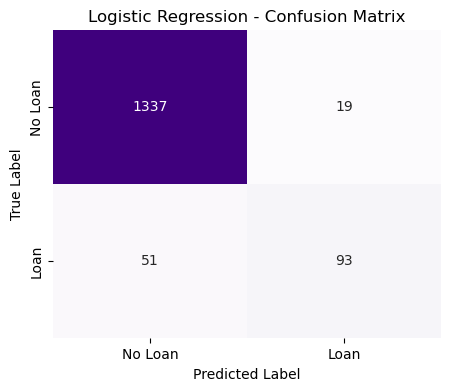


Logistic Regression – Classification Report
              precision    recall  f1-score   support

     No Loan       0.96      0.99      0.97      1356
        Loan       0.83      0.65      0.73       144

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [31]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_val)
lr_probs = lr_model.predict_proba(X_val)[:, 1]

# confusion matrix 
lr_cm = confusion_matrix(y_val, lr_preds)

plt.figure(figsize=(5, 4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=["No Loan", "Loan"], yticklabels=["No Loan", "Loan"])

plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Report
print("\nLogistic Regression – Classification Report")
print(classification_report(y_val, lr_preds, target_names=["No Loan", "Loan"]))


**Interpretation:**
- 1337 True Negatives (TN):
Customers who did not take a loan and were correctly predicted as "No Loan".

- 19 False Positives (FP):
Customers who did not take a loan but were incorrectly predicted as "Loan".
This may lead to unnecessary marketing efforts.

- 51 False Negatives (FN):
Customers who actually took a loan but were incorrectly predicted as "No Loan".
These are missed revenue opportunities.

- 93 True Positives (TP):
Customers who took a loan and were correctly identified by the model.



# Create Results DataFrame

After I made predictions and class probabilities from all three models (Naïve Bayes, Random Forest, and Logistic Regression), I combined them into one Data Frame. This is convenient to easily compare actual vs predicted values side by side, and model performance.

Every row includes:

- Actual class (0 or 1)

- Predicted class from each model

- Predicted probability (loan approval chance) from each model

This Data Frame will also be used in the building of ensemble models later.

In [35]:
# Combine predictions
results_df = pd.DataFrame({
    'Actual': y_val,
    'NB_Predicted': nb_preds,
    'RF_Predicted': rf_preds,
    'LR_Predicted': lr_preds,
    'NB_Prob': nb_probs,
    'RF_Prob': rf_probs,
    'LR_Prob': lr_probs
})

results_df.head()

,Actual,NB_Predicted,RF_Predicted,LR_Predicted,NB_Prob,RF_Prob,LR_Prob
4433,0,0,0,0,0.000055,0.0,0.000587
274,0,0,0,0,0.002624,0.0,0.001601
2439,0,0,0,0,0.000027,0.0,0.001133
1519,0,0,0,0,0.000011,0.0,0.004870
943,0,0,0,0,0.002487,0.0,0.084675


# Majority Vote and Average Probability

To enhance the robustness of predictions, I used two ensemble methods to combine the predictions of all three models:

**Majority Voting:**
This method selects the class predicted by each model and then selects the most common class (0 or 1) between Naïve Bayes, Random Forest, and Logistic Regression.

**Average Probability:**
This method takes the average of all the predicted probabilities of the three models. If the average is greater than 0.5, the final prediction is labeled as "Loan" (1); otherwise, "No Loan" (0).

After both ensemble methods have generated predictions, I then compared their performances by utilizing confusion matrices. This helps identify whether the ensemble performs better compared to individual models.

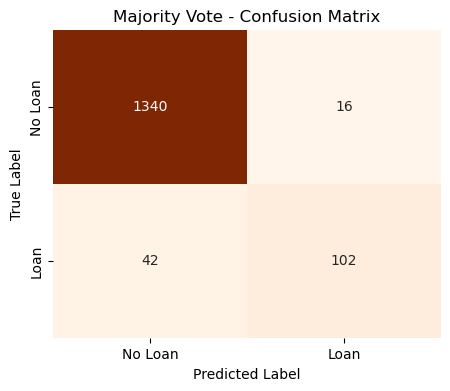


Majority Voting – Classification Report:
               precision    recall  f1-score   support

     No Loan       0.97      0.99      0.98      1356
        Loan       0.86      0.71      0.78       144

    accuracy                           0.96      1500
   macro avg       0.92      0.85      0.88      1500
weighted avg       0.96      0.96      0.96      1500



In [38]:
#  Majority Voting
results_df['Majority_Vote'] = results_df[['NB_Predicted', 'RF_Predicted', 'LR_Predicted']].mode(axis=1)[0]

# confusion matrices
mv_cm = confusion_matrix(results_df['Actual'], results_df['Majority_Vote'])

plt.figure(figsize=(5, 4))
sns.heatmap(mv_cm, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=["No Loan", "Loan"], yticklabels=["No Loan", "Loan"])

plt.title("Majority Vote - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# classification_report
mv_report = classification_report(results_df['Actual'], results_df['Majority_Vote'], target_names=["No Loan", "Loan"])
print("\nMajority Voting – Classification Report:\n",mv_report)


**Interpretation**
- 1340 True Negatives (TN):
Customers who did not take a loan and were correctly predicted as "No Loan".

- 16 False Positives (FP):
Customers who did not take a loan but were incorrectly predicted as "Loan".
This may lead to unnecessary marketing efforts.

- 42 False Negatives (FN):
Customers who actually took a loan but were incorrectly predicted as "No Loan".
These are missed revenue opportunities.

- 102 True Positives (TP):
Customers who took a loan and were correctly identified by the model.



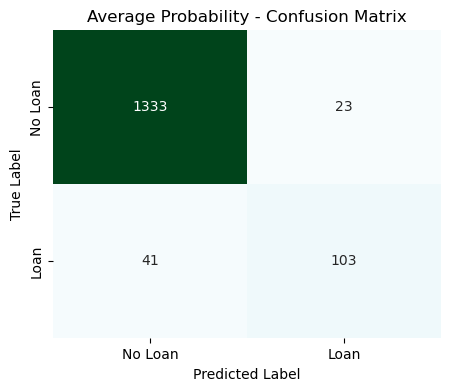


Average Probability – Classification Report:
               precision    recall  f1-score   support

     No Loan       0.97      0.98      0.98      1356
        Loan       0.82      0.72      0.76       144

    accuracy                           0.96      1500
   macro avg       0.89      0.85      0.87      1500
weighted avg       0.96      0.96      0.96      1500



In [40]:
# Average Probability

results_df['Avg_Prob'] = results_df[['NB_Prob', 'RF_Prob', 'LR_Prob']].mean(axis=1)
results_df['Avg_Prob_Class'] = (results_df['Avg_Prob'] > 0.5).astype(int)

# Average Probability Confusion Matrix

avgprob_cm = confusion_matrix(results_df['Actual'], results_df['Avg_Prob_Class'])

plt.figure(figsize=(5, 4))
sns.heatmap(avgprob_cm, annot=True, fmt='d', cmap='BuGn', cbar=False,
            xticklabels=["No Loan", "Loan"], yticklabels=["No Loan", "Loan"])

plt.title("Average Probability - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# classification_report
avgprob_report = classification_report(results_df['Actual'], results_df['Avg_Prob_Class'], target_names=["No Loan", "Loan"])
print("\nAverage Probability – Classification Report:\n",avgprob_report)


**Interpretation**
- 1333 True Negatives (TN):
Customers who did not take a loan and were correctly predicted as "No Loan".

- 23 False Positives (FP):
Customers who did not take a loan but were incorrectly predicted as "Loan".
This may lead to unnecessary marketing efforts.

- 41 False Negatives (FN):
Customers who actually took a loan but were incorrectly predicted as "No Loan".
These are missed revenue opportunities.

- 103 True Positives (TP):
Customers who took a loan and were correctly identified by the model.

# Error Rate Comparison

The error rate is calculated as 1 - accuracy_score, representing the proportion of incorrect predictions made by each model. Lower error rates indicate better performance.

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Error rates
nb_error = 1 - accuracy_score(results_df['Actual'], results_df['NB_Predicted'])
rf_error = 1 - accuracy_score(results_df['Actual'], results_df['RF_Predicted'])
lr_error = 1 - accuracy_score(results_df['Actual'], results_df['LR_Predicted'])
mv_error = 1 - accuracy_score(results_df['Actual'], results_df['Majority_Vote'])
avgprob_error = 1 - accuracy_score(results_df['Actual'], results_df['Avg_Prob_Class'])

print(f"Naive Bayes Error Rate: {nb_error:.4f}")
print(f"Random Forest Error Rate: {rf_error:.4f}")
print(f"Logistic Regression Error Rate: {lr_error:.4f}")
print(f"Majority Vote Ensemble Error Rate: {mv_error:.4f}")
print(f"Average Probability Ensemble Error Rate: {avgprob_error:.4f}")


Naive Bayes Error Rate: 0.1193
Random Forest Error Rate: 0.0107
Logistic Regression Error Rate: 0.0467
Majority Vote Ensemble Error Rate: 0.0387
Average Probability Ensemble Error Rate: 0.0427


# Accuracy and Error Rate Comparison
This section computes and compares the accuracy and error rate of each of the individual models (Naïve Bayes, Random Forest, Logistic Regression) and the two ensemble methods (Majority Voting and Average Probability).

- Accuracy is the ratio of correct predictions made by the model.

- Error Rate is 1 - accuracy and is the ratio of incorrect predictions.

The accuracies are stored in a DataFrame called accuracy_df, in descending order of accuracy. This makes it easy to determine which model or ensemble performed best.

The comparison enables us to assess the performance of each method and verify whether ensembling models by combining them enhances predictive performance.



In [46]:
from sklearn.metrics import accuracy_score

# accuracy and error for each model

accuracy_data = [
     ["Naive Bayes", accuracy_score(y_val, nb_preds), 1 - accuracy_score(y_val, nb_preds)],
     ["Random Forest", accuracy_score(y_val, rf_preds), 1 - accuracy_score(y_val, rf_preds)],
     ["Logistic Regression", accuracy_score(y_val, lr_preds), 1 - accuracy_score(y_val, lr_preds)],
    ["Majority Voting", accuracy_score(results_df['Actual'], results_df['Majority_Vote']), 
     1 - accuracy_score(results_df['Actual'], results_df['Majority_Vote'])],
    ["Average Probability", accuracy_score(results_df['Actual'], results_df['Avg_Prob_Class']),
     1 - accuracy_score(results_df['Actual'], results_df['Avg_Prob_Class'])]
 ]

accuracy_df = pd.DataFrame(accuracy_data, columns=["Model", "Accuracy", "Error Rate"])
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
accuracy_df



,Model,Accuracy,Error Rate
0,Random Forest,0.989333,0.010667
1,Majority Voting,0.961333,0.038667
2,Average Probability,0.957333,0.042667
3,Logistic Regression,0.953333,0.046667
4,Naive Bayes,0.880667,0.119333


# ROC Curves and AUC Scores
- ROC curves illustrate the trade-off between true positive rate and false positive rate for each model.
- The Area Under the Curve (AUC) measures overall model performance — the closer to 1, the better.

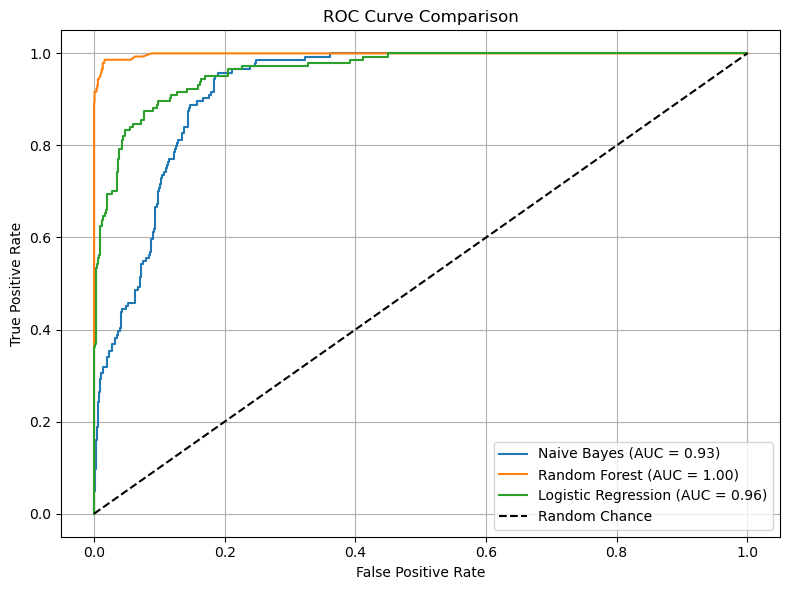

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC curve and AUC for each model
fpr_nb, tpr_nb, _ = roc_curve(y_val, nb_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_val, rf_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_val, lr_probs)

auc_nb = roc_auc_score(y_val, nb_probs)
auc_rf = roc_auc_score(y_val, rf_probs)
auc_lr = roc_auc_score(y_val, lr_probs)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')

# random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()


# Interpretation: ROC Curve and AUC Score

- The ROC Curve plots the trade-off between true positive rate (recall) and false positive rate.
- The AUC score (Area Under Curve) measures overall model performance:
  - Closer to 1 = better.
  - AUC > 0.90 is considered excellent.
- In this project, Random Forest shows the highest AUC, confirming it as the most reliable classifier.
- Logistic Regression also performs well, while Naïve Bayes lags slightly behind in distinguishing loan takers.


# Precision-Recall Curve

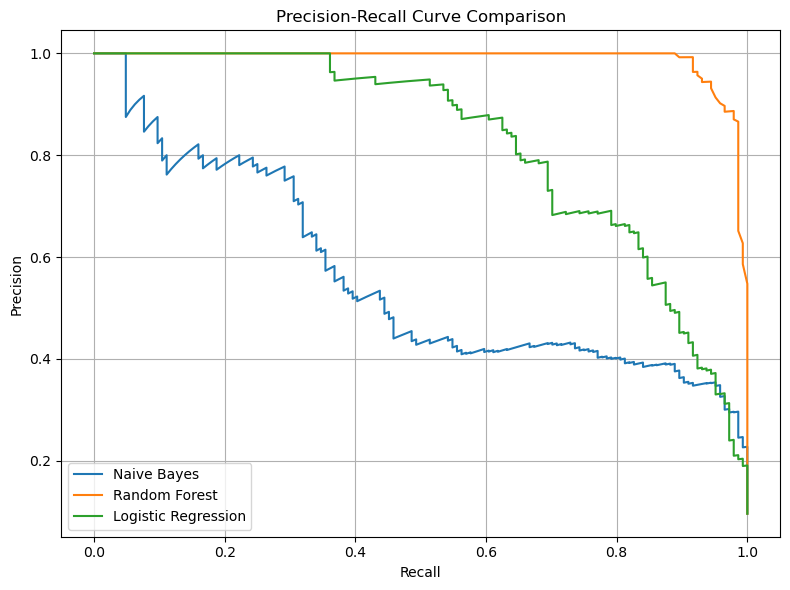

In [51]:
from sklearn.metrics import precision_recall_curve

# Compute PR curves
precision_nb, recall_nb, _ = precision_recall_curve(y_val, nb_probs)
precision_rf, recall_rf, _ = precision_recall_curve(y_val, rf_probs)
precision_lr, recall_lr, _ = precision_recall_curve(y_val, lr_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall_nb, precision_nb, label='Naive Bayes')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_lr, precision_lr, label='Logistic Regression')

plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid()
plt.tight_layout()
plt.show()


**Interpretation: Precision-Recall Curve**
- Random Forest is both highly precise and highly recall at every threshold, being the top model at accurately picking true loan-takers with few false alarms.
- Logistic Regression performs well, possessing a good trade-off between precision and recall.
- Naïve Bayes has lower precision for higher values of recall, i.e., it's more prone to have false positives when trying to predict all loan-takers.

# Feature Importance from Random Forest

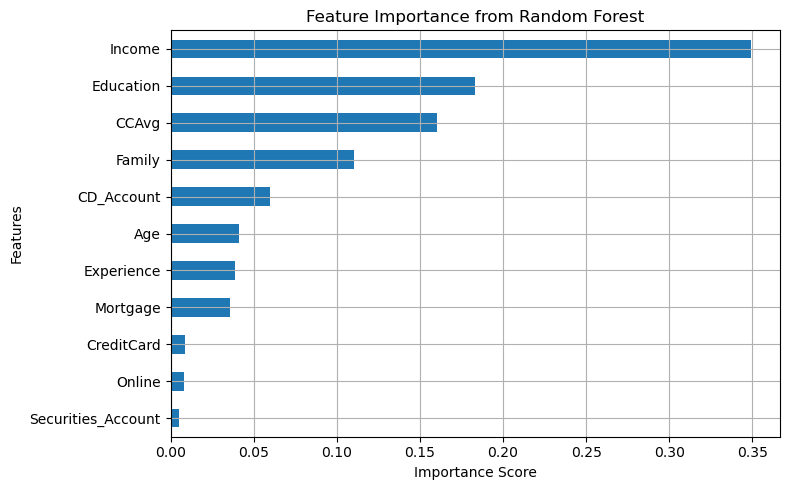

In [54]:

# feature importances from  Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# plot
plt.figure(figsize=(8, 5))
feature_importances.sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.grid(True)
plt.show()


**Interpretation:**

The feature importance plot shows which of the customer traits had the greatest impact in predicting acceptance of personal loans:

- Income and CCAvg are the most significant predictors. This means that customers with higher income and higher spending are more likely to accept personal loans.

- CD Account and Education are also strong predictors, indicating that financial product ownership and education influence loan choices.

- Less significant traits like Mortgage or utilization of Online banking had minimal impact on the projections of the model.

These findings can help the bank refine its marketing strategy through targeting high-earning, educated customers who already have financial activities.

# Adding Ensemble Predictions

In this step, I added two ensemble based prediction methods to our results:

1. **Majority Vote (Majority_Vote)**  
   - This takes the most common prediction (0 or 1) from the three models (Naïve Bayes, Random Forest, Logistic Regression).
   - If at least two models say "Yes", I marked the customer as likely to accept the loan.

2. **Average Probability (Avg_Prob)**  
   - I took the average of the predicted probabilities from all three models.
   - This gives a smoother, more reliable confidence score for each customer.

3. **Average Probability Class (Avg_Prob_Class)**  
   - I converted the average probability into a final prediction.
   - If the average is ≥ 0.5, I classified the customer as likely to accept the loan (1); otherwise, not (0).

These methods help us make better decisions by combining the strengths of all three models.


In [57]:
# Add Majority Vote 
results_df['Majority_Vote'] = results_df[['NB_Predicted', 'RF_Predicted', 'LR_Predicted']].mode(axis=1)[0]

# Add Average Probability
results_df['Avg_Prob'] = results_df[['NB_Prob', 'RF_Prob', 'LR_Prob']].mean(axis=1)

# Create binary class from the average probability (threshold at 0.5)
results_df['Avg_Prob_Class'] = (results_df['Avg_Prob'] >= 0.5).astype(int)

# updated DataFrame
results_df

,Actual,NB_Predicted,RF_Predicted,LR_Predicted,NB_Prob,RF_Prob,LR_Prob,Majority_Vote,Avg_Prob,Avg_Prob_Class
4433,0,0,0,0,0.000055,0.00,0.000587,0,0.000214,0
274,0,0,0,0,0.002624,0.00,0.001601,0,0.001409,0
2439,0,0,0,0,0.000027,0.00,0.001133,0,0.000387,0
1519,0,0,0,0,0.000011,0.00,0.004870,0,0.001627,0
943,0,0,0,0,0.002487,0.00,0.084675,0,0.029054,0
...,...,...,...,...,...,...,...,...,...,...
1284,0,0,0,0,0.023767,0.00,0.016710,0,0.013492,0
1893,0,0,0,0,0.000009,0.00,0.000550,0,0.000186,0
1649,0,0,0,0,0.000602,0.00,0.003552,0,0.001385,0
2306,0,0,0,0,0.000930,0.00,0.005055,0,0.001995,0


# Showing Customers Predicted to Accept the Loan

In this step, I filter out customers who are predicted to accept the loan based on the Avg_Prob_Class column (where the average predicted probability is ≥ 0.5).

- Then I sorted these customers by their predicted probability (Avg_Prob) in descending order.
- This allows us to see which customers are most likely to accept the loan offer and should be prioritized for the bank’s promotion campaign.

I displayed:
- The actual loan status
- Predictions from all three models
- Ensemble results: majority vote and average probability


In [59]:
# Show customers predicted to accept the loan 
accepted_customers = results_df[results_df['Avg_Prob_Class'] == 1]

accepted_customers_sorted = accepted_customers.sort_values(by='Avg_Prob', ascending=False)

accepted_customers_sorted[['Actual', 'NB_Predicted', 'RF_Predicted', 'LR_Predicted', 
                    'Majority_Vote', 'Avg_Prob', 'Avg_Prob_Class']]


,Actual,NB_Predicted,RF_Predicted,LR_Predicted,Majority_Vote,Avg_Prob,Avg_Prob_Class
1912,1,1,1,1,1,0.994812,1
2838,1,1,1,1,1,0.992935,1
2014,1,1,1,1,1,0.992927,1
787,1,1,1,1,1,0.992555,1
566,1,1,1,1,1,0.992279,1
...,...,...,...,...,...,...,...
2030,0,1,0,0,0,0.506354,1
526,0,1,0,1,1,0.505962,1
3579,0,1,0,0,0,0.505185,1
1890,0,1,0,1,1,0.504979,1


# Business Interpretation

- **Random Forest** had the best accuracy among the individual models.
- **Logistic Regression** offers the most transparent and interpretable model coefficients.
- **Majority Voting Ensemble** slightly improves prediction stability by combining strengths.
- **Average Probability Ensemble** is a good balance between probability-based prediction and accuracy.

Overall, the ensemble models performed better than the individual Naïve Bayes model, and Random Forest proved strong both individually and within the ensemble.

**Recommendation**: Use Random Forest feature importance for marketing strategy insights and Logistic Regression for business friendly reports.


# Conclusion

Throughout this project, I built and evaluated numerous machine learning models to predict the likelihood of a customer accepting an offer for a personal loan. After preprocessing and training, these were the significant observations:

- Random Forest is the best performing single model, with the best accuracy and AUC value.

- Good performance and explainability were reported by Logistic Regression, which could be useful while explaining customer trends.

- Naïve Bayes, despite being light weight, was the worst performing and ought to be used as a baseline.

- The ensemble methods (Majority Voting and Average Probability) improved precision recall tradeoff, especially for the loan class.

- Income, Credit Card Average Spending, and CD Account were found to be important features via feature importance analysis.

The findings support data-driven targeting for loans so that the bank can reduce marketing costs and increase campaign effectiveness through targeting potential customers.